# Sorting the number of planets

Author: Ningyue Xu

Course Project, UC Irvine, Math 10, S22

## Introduction

Introduce your project here.  Maybe 3 sentences.

In the analysis of this project, we tried to analyze some variables of this planet dataset. We tried to classify them in various ways. After sorting "method", we used various methods to try to sort out "numbers" based on other variables

## Main portion of the project

(You can either have all one section or divide into multiple sections)

First, we import the library needed for this project, import the seaborn database "planets", and handle the lost data.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import log_loss, mean_squared_error,mean_absolute_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
df=sns.load_dataset("planets").dropna()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In this data set, I want to try to see if other variables will be related to “method”, that is, I want to classify “method”.

In [ ]:
numcols = [c for c in df.columns if c != "method"]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[numcols])
df["cluster"] = kmeans.predict(df[numcols])

In [ ]:
alt.Chart(df).mark_circle().encode(
    x = "mass",
    y = "distance",
    color = "method:N",
    tooltip = ["cluster","number"]
).interactive()

alt.Chart(...)

Due to the small number of transit samples, I initially intended to use “add_selection” to aid in the analysis, but the results still did not meet my needs

In [ ]:
brush = alt.selection_interval()
c1=alt.Chart(df).mark_circle().encode(
    x = "mass",
    y = "distance",
    color = "method:N",
    tooltip = ["cluster","number"]
).add_selection(brush)

In [ ]:
c2=alt.Chart(df).mark_circle().encode(
    x = "mass",
    y = "distance",
    color = "method:N"
).transform_filter(brush)

In [ ]:
c1|c2

alt.HConcatChart(...)

At the beginning of the production, I had intended to use different x,y to analyze what the “method” was classified according to. However, after the first graph was shown, I abandoned this aspect of the idea because the "methods" were divided into two categories and the distribution was apparently too unbalanced and the analysis of methods was apparently less meaningful because it was too random.
    Therefore, I decided to discard the variable “method” and move to a more balanced analysis of the data. I noticed that "numbers" are naturally divided into six categories, so I wanted to try if cluster could show the classification of "numbers".

In [ ]:
kmeans2 = KMeans(n_clusters=6)
kmeans2.fit(df[numcols])
df["cluster2"] = kmeans2.predict(df[numcols])

In [ ]:
chart_list = []

for c in numcols:
    chart = alt.Chart(df).mark_circle().encode(
        x = "mass",
        y = c,
        color = "cluster2:N"
    )
    chart_list.append(chart)

In [ ]:
alt.vconcat(*chart_list)

alt.VConcatChart(...)

When we look at the data, we can be surprised to find that orbital period and mass are clearly correlated with the subcluster. In other words, when we classify the data, orbital period is an important basis for classification. This also shows that cluster is not very intuitive in dividing the number into six categories.

Considering that orbital itself has large data, which may affect the classification due to this situation, let's re-analyze this related situation with orbital as the x-axis

In [ ]:
chart_list2 = []

for c in numcols:
    chart = alt.Chart(df).mark_circle().encode(
        x = "orbital_period",
        y = c,
        color = "cluster2:N"
    )
    chart_list2.append(chart)

In [ ]:
alt.vconcat(*chart_list2)

alt.VConcatChart(...)

We find that orbital appears significantly clustered for each variable. at this point, we can realize that the impact on the classification caused by the excessive size of the orbital data itself is significant. Therefore, we need to take rescaling of the data

In [ ]:
df2 = df.copy()
scaler = StandardScaler(with_mean=True, with_std=False)
scaler.fit(df[numcols])
df2[numcols] = scaler.transform(df[numcols])

Then we repeat the steps above. Knowing the extreme imbalance of the data in the method itself, we do not analyze the method any more, but mainly in the process of cluster and number

In [ ]:
kmeans3 = KMeans(n_clusters=6)
kmeans3.fit(df2[numcols])
df2["cluster2"] = kmeans3.predict(df2[numcols])

In [ ]:
chart_list3 = []

for c in numcols:
    chart = alt.Chart(df2).mark_circle().encode(
        x = "mass",
        y = c,
        color = "cluster2:N"
    )
    chart_list3.append(chart)

In [ ]:
alt.vconcat(*chart_list3)

alt.VConcatChart(...)

In [ ]:
chart_list4 = []

for c in numcols:
    chart = alt.Chart(df2).mark_circle().encode(
        x = "orbital_period",
        y = c,
        color = "cluster2:N"
    )
    chart_list4.append(chart)

In [ ]:
alt.vconcat(*chart_list4)

alt.VConcatChart(...)

At this point, we can already confirm very clearly the validity of orbital for classification. Moreover, it is clear that this classification has little to do with “number”.

After this, I want to use KNeighborsClassifier for predicting the number of planets

In [ ]:
df2

,method,number,orbital_period,mass,distance,year,cluster,cluster2
0,Radial Velocity,-0.73494,-566.478671,4.59068,25.331787,-1.37751,1,0
1,Radial Velocity,-0.73494,38.995329,-0.29932,4.881787,0.62249,1,4
2,Radial Velocity,-0.73494,-72.778671,0.09068,-32.228213,3.62249,1,4
3,Radial Velocity,-0.73494,-509.748671,16.89068,58.551787,-0.37751,1,0
4,Radial Velocity,-0.73494,-319.558671,7.99068,67.401787,1.62249,1,0
...,...,...,...,...,...,...,...,...
640,Radial Velocity,-0.73494,-724.078671,-0.40932,-37.168213,1.62249,1,0
641,Radial Velocity,-0.73494,-830.728171,-1.44132,-7.608213,5.62249,1,0
642,Radial Velocity,-0.73494,-524.490671,-0.56932,-34.828213,-8.37751,1,0
649,Transit,-0.73494,-833.075280,-1.03932,125.931787,5.62249,1,0


In [ ]:
X = df2.iloc[:,2:]
y = df["number"]

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

We divide the variables into train and test, and use random state to fix the array for each random selection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.6, random_state=4)

In [ ]:
clf = KNeighborsClassifier( )
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
df2['predict_K'] = clf.predict(X_scaled)
(df["number"] == df2["predict_K"]).value_counts()

True     338
False    160
dtype: int64

Here, a relatively large gap appears between the predicted and real data. Therefore, we want to consider the case of overfitting and underfitting by using kneighbors regressor

In [ ]:
def get_scores(k):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    train_error = mean_absolute_error(reg.predict(X_train), y_train)
    test_error = mean_absolute_error(reg.predict(X_test), y_test)
    return (train_error, test_error)

In [ ]:
df2_scores = pd.DataFrame({"k":range(1,150),"train_error":np.nan,"test_error":np.nan})

In [ ]:
for i in df2_scores.index:
    df2_scores.loc[i,["train_error","test_error"]] = get_scores(df2_scores.loc[i,"k"])

In [ ]:
df2_scores["k"] = df2_scores.k

In [ ]:
ctrain = alt.Chart(df2_scores).mark_line().encode(
    x = "k",
    y = "train_error"
)
ctest = alt.Chart(df2_scores).mark_line(color="orange").encode(
    x = "k",
    y = "test_error"
)

In [ ]:
ctrain+ctest

alt.LayerChart(...)

Here, we note that larger k values appear to be underfitting, while smaller k values appear to be overfitting, and it would be more appropriate to choose k values between 40 and 80.
When we rescale the number of k, we observe whether the k Neighbors classifier can predict more accurately

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=45)
clf2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=45)

In [ ]:
df2['predict_K2'] = clf2.predict(X_scaled)
(df["number"] == df2["predict_K2"]).value_counts()

True     313
False    185
dtype: int64

At this point, we will find that this prediction result still has a large gap, which means that overfitting and underfitting are not the main reasons for the prediction error.

At this point we went back to the data for analysis, and I realized that the data sets of year (year of discovery) and distance (distance from Earth) did not seem to reflect the number of planets intuitively, so the problem with the previous analysis might be that some of the data did not relate to "numbers". Therefore, we remove year and distance and re-run the codes before.

In [ ]:
X2 = df2.iloc[:,3:4]
y = df["number"]

In [ ]:
scaler = StandardScaler()
scaler.fit(X2)
X2_scaled = scaler.transform(X2)

In [ ]:
X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, train_size=0.6, random_state=4)

In [ ]:
clf = KNeighborsClassifier( )
clf.fit(X2_train, y_train)

KNeighborsClassifier()

In [ ]:
df2['predict_K'] = clf.predict(X2_scaled)
(df["number"] == df2["predict_K"]).value_counts()

True     314
False    184
dtype: int64

After replacing the ranges, we found that this classification still did not work, and we seemed to have to admit that "number" did not seem to have much to do with the other variables.

Next, we analyze the correlation between the variables.

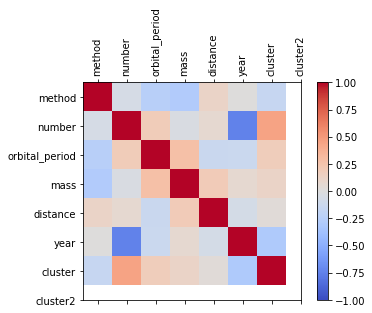

In [ ]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In this set of plots, we can find that "method" is not very correlated with each data, while the most correlated data with "number" is "year". therefore, we incorrectly estimated the correlation between different variables before

We can now try to see if there is a linear relationship between “year” and “number”

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df2[["year"]], df2["number"])
df2["Pred"] = reg.predict(df2[["year"]])


In [ ]:
c = alt.Chart(df2).mark_circle().encode(
    x="year",
    y="number"
)
c1 = alt.Chart(df2).mark_line(color="red").encode(
    x="year",
    y="Pred"
)
c+c1

alt.LayerChart(...)

When we analyzed it, we found that this line was more different from what we thought it would be. Therefore, we try polynomial regression.

In [ ]:
df2_train, df2_test = train_test_split(df2, train_size=0.4)

In [ ]:
cols = []
for deg in range(1,10):
    c = f"d{deg}"
    cols.append(c)
    df2_train[c] = df2_train["year"]**deg

In [ ]:
reg.fit(df2_train[cols], df2_train["number"])

LinearRegression()

In [ ]:
df2_train["Pred2"] = reg.predict(df2_train[cols])

In [ ]:
c = alt.Chart(df2_train).mark_circle().encode(
    x="year",
    y="number"
)

c9 = alt.Chart(df2_train).mark_line(color="red").encode(
    x="year",
    y="Pred2"
)

c+c9

alt.LayerChart(...)

After the analysis, we found that the polynomial form was more in line with our idea.

## Summary


It is difficult to classify the more unbalanced data ("method" in this dataset) directly. And the classification of other variables requires a better determination of whether the different variables are correlated or not. In the present data, "number" correlates poorly with many variables, making it difficult to predict accurately.

## References

* What is the source of your dataset(s)?
Seaborn "planet"

* Were any portions of the code or ideas taken from another source?  List those sources here and say how they were used.
https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
After two failed groupings, I wanted to find the variable that was actually associated with number.

* List other references that you found helpful.
https://python.plainenglish.io/9-datasets-for-data-science-ml-beginners-cfb57df53fda
In my earliest search for a dataset, I referred to this site and chose the “planet” from seaborn

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=098b780c-d478-42ad-92da-49fc70e974fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>